In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import freq_tbl 
import re
from turtle import color

In [16]:

dfa=pd.read_csv("listingsamsterdam.csv")

***AMSTERDAM***

In [17]:
dfa.head(5)
dfa.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 75, dtype: object

In [18]:
#Se eliminan los valores nulos
dfa.isnull().sum()
dfa=dfa.fillna(method='ffill')
dfa=dfa.fillna(method='bfill')

/var/folders/6c/rr21_80s11n3cvrghbnb5mz00000gn/T/ipykernel_4833/1736785499.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfa=dfa.fillna(method='ffill')
/var/folders/6c/rr21_80s11n3cvrghbnb5mz00000gn/T/ipykernel_4833/1736785499.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfa=dfa.fillna(method='bfill')


In [19]:
#Como no funciono el bfill y ffill usamos el metodo de sustituir por una palabra 
dfa1=dfa.fillna('nulos')
dfa1.info()
dfa1.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9310 entries, 0 to 9309
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9310 non-null   int64  
 1   listing_url                                   9310 non-null   object 
 2   scrape_id                                     9310 non-null   int64  
 3   last_scraped                                  9310 non-null   object 
 4   source                                        9310 non-null   object 
 5   name                                          9310 non-null   object 
 6   description                                   9310 non-null   object 
 7   neighborhood_overview                         9310 non-null   object 
 8   picture_url                                   9310 non-null   object 
 9   host_id                                       9310 non-null   i

0

In [20]:
#Reemplazamos el $ en la columna price para que se vuelva numerica 
dfa1['price'] = dfa1['price'].str.replace('$', '', regex=False)
dfa1['price'] = dfa1['price'].str.replace(',', '', regex=False)
dfa1['price'] = pd.to_numeric(dfa1['price'])

In [21]:
dfa1['price']

0       200.0
1       200.0
2       155.0
3       155.0
4       155.0
        ...  
9305    120.0
9306    310.0
9307    180.0
9308    280.0
9309    325.0
Name: price, Length: 9310, dtype: float64

In [22]:
#Se separan las columnas por cualitativas y cuantitativas
numcol=dfa1.select_dtypes(include=['number'])
catcolsinfiltrar=dfa1.select_dtypes(include=['object'])

In [23]:
#Se seleccionan las variables solicitadas 
catcol=catcolsinfiltrar[['host_response_time','host_acceptance_rate','property_type','room_type','amenities','host_is_superhost']]

In [24]:
#Se procesan los datos nulos de las varibales numericas 
numcol.isnull().sum().sum()
numcol=numcol.fillna(method='ffill')
numcol=numcol.fillna(method='bfill')

/var/folders/6c/rr21_80s11n3cvrghbnb5mz00000gn/T/ipykernel_4833/3788119204.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numcol=numcol.fillna(method='ffill')
/var/folders/6c/rr21_80s11n3cvrghbnb5mz00000gn/T/ipykernel_4833/3788119204.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  numcol=numcol.fillna(method='bfill')


In [25]:
#Comprobamos los valores faltantes nuevamente 
numcol.isnull().sum().sum()

0

In [26]:
numcol_sinid=numcol.drop(['id','host_id','scrape_id'],axis=1)

<Figure size 1500x800 with 0 Axes>

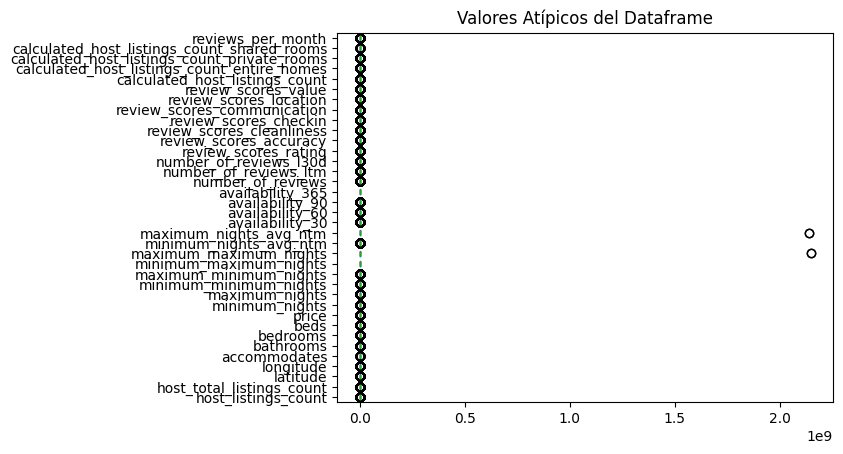

In [27]:
#Obtenemos los limites superior e inferior de todas las variables numericas
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
numcol_sinid.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() 

In [28]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=numcol_sinid
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_listings_count                             9.885468e+01
host_total_listings_count                       1.501162e+02
latitude                                        5.241881e+01
longitude                                       4.996959e+00
accommodates                                    7.033283e+00
bathrooms                                       3.032154e+00
bedrooms                                        4.320208e+00
beds                                            6.527505e+00
price                                           3.201865e+03
minimum_nights                                  6.270322e+01
maximum_nights                                  1.623461e+03
minimum_minimum_nights                          5.801519e+01
maximum_minimum_nights                          6.342350e+01
minimum_maximum_nights                          1.837076e+03
maximum_maximum_nights                          9.488261e+07
minimum_nights_avg_ntm                          6.230631e+0

In [31]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
numcol_outliers= numcol_sinid[(y<=Limite_Superior)&(y>=Limite_Inferior)]
numcol_outliers.head(3)

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3.0,3.0,52.35931,4.89844,4.0,1.5,2.0,2.0,200.0,4.0,...,4.63,4.84,4.88,4.91,4.66,3.0,2.0,1.0,0.0,0.22
1,2.0,2.0,52.39185,4.88690,NaN,1.5,NaN,2.0,200.0,2.0,...,4.69,4.86,4.88,4.58,4.48,2.0,2.0,0.0,0.0,0.72
2,3.0,3.0,52.35871,4.89616,2.0,1.0,1.0,0.0,155.0,3.0,...,5.00,5.00,5.00,5.00,5.00,3.0,2.0,1.0,0.0,0.04


In [32]:
#Comprobamos los valores atipicos que se volvieron nulos 
numcol_outliers.isnull().sum()

host_listings_count                              32
host_total_listings_count                        32
latitude                                        131
longitude                                       114
accommodates                                     79
bathrooms                                        95
bedrooms                                         71
beds                                             59
price                                             5
minimum_nights                                   41
maximum_nights                                    0
minimum_minimum_nights                           32
maximum_minimum_nights                           40
minimum_maximum_nights                            0
maximum_maximum_nights                            2
minimum_nights_avg_ntm                           40
maximum_nights_avg_ntm                            2
availability_30                                 318
availability_60                                  76
availability

In [33]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
numcol_clean=numcol_outliers.copy()
numcol_clean=numcol_clean.fillna(round(numcol_outliers.mean(),1))
numcol_clean.head(3)

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3.0,3.0,52.35931,4.89844,4.0,1.5,2.0,2.0,200.0,4.0,...,4.63,4.84,4.88,4.91,4.66,3.0,2.0,1.0,0.0,0.22
1,2.0,2.0,52.39185,4.88690,2.9,1.5,1.5,2.0,200.0,2.0,...,4.69,4.86,4.88,4.58,4.48,2.0,2.0,0.0,0.0,0.72
2,3.0,3.0,52.35871,4.89616,2.0,1.0,1.0,0.0,155.0,3.0,...,5.00,5.00,5.00,5.00,5.00,3.0,2.0,1.0,0.0,0.04


In [34]:
#Corroboramos valores nulos del dataframe LIMPIO
numcol_clean.isnull().sum().sum()

0

In [37]:
#Guardar la nueva base de datos
numcol_clean.to_csv("amsterdamlimpio.csv")